### All Classifiers in Machine Learning in Action
+ Decision Tree
+ Random Forest
+ Naive Bayes
+ Gradiant Boosting
+ K-Nearest Neighbour
+ Logistic Regression
+ Support Vector Machine (SVM)

Loading Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Loading Data Set

In [2]:
brain_stroke = pd.read_csv("../../datasets/brain_stroke.csv")

In [3]:
brain_stroke.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [4]:
brain_stroke.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB


In [5]:
brain_stroke.info

<bound method DataFrame.info of       gender   age  hypertension  heart_disease ever_married      work_type  \
0       Male  67.0             0              1          Yes        Private   
1       Male  80.0             0              1          Yes        Private   
2     Female  49.0             0              0          Yes        Private   
3     Female  79.0             1              0          Yes  Self-employed   
4       Male  81.0             0              0          Yes        Private   
...      ...   ...           ...            ...          ...            ...   
4976    Male  41.0             0              0           No        Private   
4977    Male  40.0             0              0          Yes        Private   
4978  Female  45.0             1              0          Yes       Govt_job   
4979    Male  40.0             0              0          Yes        Private   
4980  Female  80.0             1              0          Yes        Private   

     Residence_type

In [6]:
#checking columns in two ways

In [7]:
brain_stroke.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

##### Checking all column names 

In [8]:
[column for column in brain_stroke]

['gender',
 'age',
 'hypertension',
 'heart_disease',
 'ever_married',
 'work_type',
 'Residence_type',
 'avg_glucose_level',
 'bmi',
 'smoking_status',
 'stroke']

##### checking missing values in columns

In [9]:
brain_stroke.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

##### Drop some column which is not necessary for anallysis

In [10]:
brain_stroke.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [11]:
colum_to_drop = ["ever_married","work_type","Residence_type"]

In [12]:
brain_stroke = brain_stroke.drop(colum_to_drop, axis=1)

In [13]:
brain_stroke

,gender,age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,105.92,32.5,never smoked,1
2,Female,49.0,0,0,171.23,34.4,smokes,1
3,Female,79.0,1,0,174.12,24.0,never smoked,1
4,Male,81.0,0,0,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...
4976,Male,41.0,0,0,70.15,29.8,formerly smoked,0
4977,Male,40.0,0,0,191.15,31.1,smokes,0
4978,Female,45.0,1,0,95.02,31.8,smokes,0
4979,Male,40.0,0,0,83.94,30.0,smokes,0


##### Converting catagorical values into binary
+ we will creat dummies

In [14]:
brain_stroke.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   avg_glucose_level  4981 non-null   float64
 5   bmi                4981 non-null   float64
 6   smoking_status     4981 non-null   object 
 7   stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(2)
memory usage: 311.4+ KB


##### Creating Dummies for catagorical columns

In [15]:
genderD = pd.get_dummies(brain_stroke['gender'])

In [16]:
genderD.head()

,Female,Male
0,0,1
1,0,1
2,1,0
3,1,0
4,0,1


In [17]:
genderD = pd.get_dummies(brain_stroke['gender']).iloc[:,:]

In [18]:
genderD.head()

,Female,Male
0,0,1
1,0,1
2,1,0
3,1,0
4,0,1


In [19]:
smokingD = pd.get_dummies(brain_stroke['smoking_status'])

In [20]:
smokingD.head()

,Unknown,formerly smoked,never smoked,smokes
0,0,1,0,0
1,0,0,1,0
2,0,0,0,1
3,0,0,1,0
4,0,1,0,0


In [21]:
smokingD = pd.get_dummies(brain_stroke['smoking_status']).iloc[:,1:]

In [22]:
smokingD.head()

,formerly smoked,never smoked,smokes
0,1,0,0
1,0,1,0
2,0,0,1
3,0,1,0
4,1,0,0


In [23]:
brain_strk=pd.concat([brain_stroke,genderD,smokingD],axis=1)

In [24]:
brain_strk.head()

,gender,age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status,stroke,Female,Male,formerly smoked,never smoked,smokes
0,Male,67.0,0,1,228.69,36.6,formerly smoked,1,0,1,1,0,0
1,Male,80.0,0,1,105.92,32.5,never smoked,1,0,1,0,1,0
2,Female,49.0,0,0,171.23,34.4,smokes,1,1,0,0,0,1
3,Female,79.0,1,0,174.12,24.0,never smoked,1,1,0,0,1,0
4,Male,81.0,0,0,186.21,29.0,formerly smoked,1,0,1,1,0,0


In [25]:
drop_colum = ["gender","smoking_status"]

In [26]:
brain_strk = brain_strk.drop(drop_colum, axis=1)

In [27]:
#Check that columns are drop

In [28]:
brain_strk.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,Female,Male,formerly smoked,never smoked,smokes
0,67.0,0,1,228.69,36.6,1,0,1,1,0,0
1,80.0,0,1,105.92,32.5,1,0,1,0,1,0
2,49.0,0,0,171.23,34.4,1,1,0,0,0,1
3,79.0,1,0,174.12,24.0,1,1,0,0,1,0
4,81.0,0,0,186.21,29.0,1,0,1,1,0,0


In [29]:
y = brain_strk['stroke']

In [30]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: stroke, dtype: int64

In [31]:
brain_strk.drop(["stroke"],axis=1,inplace=True)

In [32]:
brain_strk.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,Female,Male,formerly smoked,never smoked,smokes
0,67.0,0,1,228.69,36.6,0,1,1,0,0
1,80.0,0,1,105.92,32.5,0,1,0,1,0
2,49.0,0,0,171.23,34.4,1,0,0,0,1
3,79.0,1,0,174.12,24.0,1,0,0,1,0
4,81.0,0,0,186.21,29.0,0,1,1,0,0


##### Train_test_split

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
x_train, x_test, y_train, y_test = train_test_split(brain_strk,y,test_size=0.3,random_state=0)

##### Build Decision Tree Classifier

In [136]:
#use simple decision tree classifier
from sklearn import tree
dt_clf=tree.DecisionTreeClassifier(max_depth=4)

In [137]:
dt_clf.fit(x_train,y_train)#train

DecisionTreeClassifier(max_depth=4)

[Text(0.5431034482758621, 0.9, 'X[0] <= 73.5\ngini = 0.099\nsamples = 3486\nvalue = [3303, 183]'),
 Text(0.27586206896551724, 0.7, 'X[0] <= 53.5\ngini = 0.061\nsamples = 3091\nvalue = [2993, 98]'),
 Text(0.13793103448275862, 0.5, 'X[4] <= 48.85\ngini = 0.02\nsamples = 2206\nvalue = [2184, 22]'),
 Text(0.06896551724137931, 0.3, 'X[0] <= 37.5\ngini = 0.019\nsamples = 2204\nvalue = [2183, 21]'),
 Text(0.034482758620689655, 0.1, 'gini = 0.003\nsamples = 1379\nvalue = [1377, 2]'),
 Text(0.10344827586206896, 0.1, 'gini = 0.045\nsamples = 825\nvalue = [806, 19]'),
 Text(0.20689655172413793, 0.3, 'X[3] <= 161.62\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.1724137931034483, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.2413793103448276, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.41379310344827586, 0.5, 'X[3] <= 180.865\ngini = 0.157\nsamples = 885\nvalue = [809, 76]'),
 Text(0.3448275862068966, 0.3, 'X[8] <= 0.5\ngini = 0.118\nsamples = 698\nvalue = [654, 44]'),

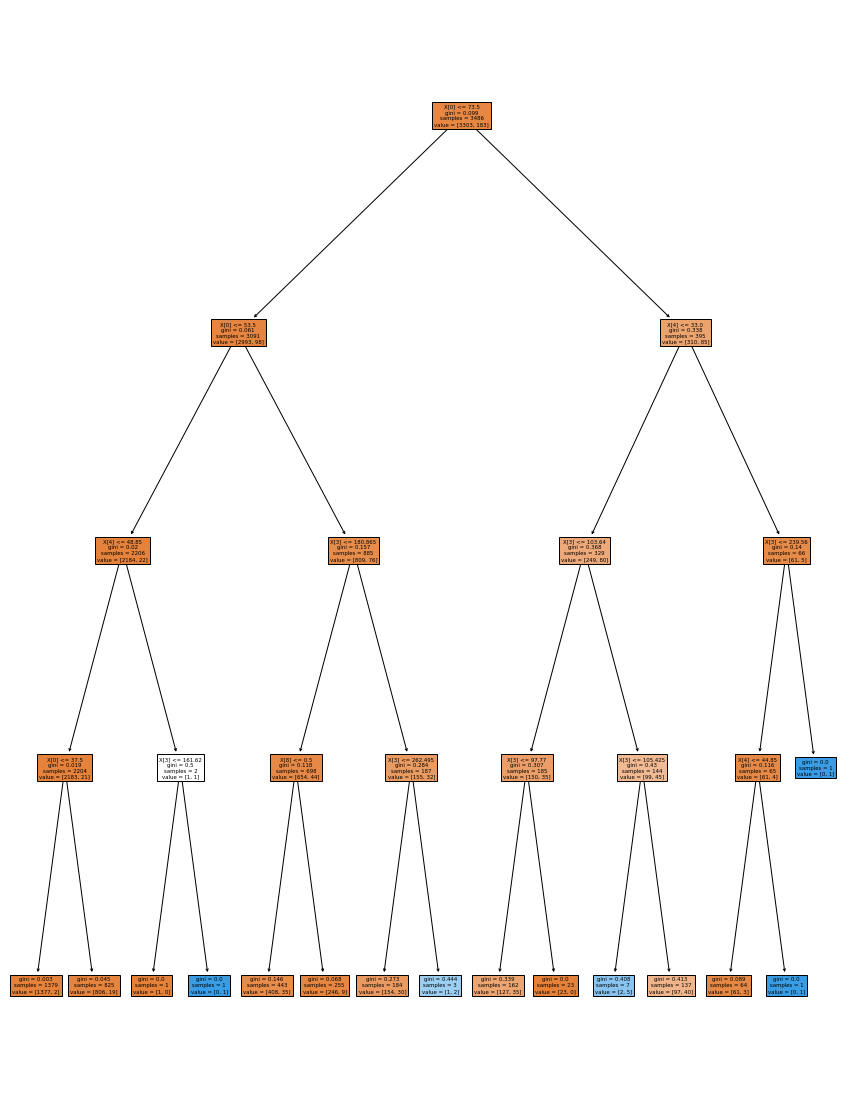

In [138]:
from sklearn import tree
plt.figure(figsize=(15,20))
tree.plot_tree(dt_clf,filled=True)

In [139]:
dt_clf.score(x_test,y_test) #make prediction

0.954515050167224

In [140]:
y_pred= dt_clf.predict(x_test)

In [141]:
dt_clf.score(x_test,y_test)

0.954515050167224

In [142]:
## Preprunning
parameter={
'criterion':['gini','entropy','log_loss'],
  'splitter':['best','random'],
  'max_depth':[1,2,3,4,5],
  'max_features':['auto', 'sqrt', 'log2']
    
}

In [126]:
from sklearn.model_selection import GridSearchCV

In [129]:
dt_clf=tree.DecisionTreeClassifier()
cv=GridSearchCV(dt_clf,param_grid=parameter,cv=5,scoring='accuracy')

In [131]:
cv.fit(x_train,y_train)

/home/muhammadsardardaudkhan/.local/lib/python3.8/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/home/muhammadsardardaudkhan/.local/lib/python3.8/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/home/muhammadsardardaudkhan/.local/lib/python3.8/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/home/muhammadsardardaudkhan/.local/lib/python3.8/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [132]:
cv.best_params_

{'criterion': 'gini',
 'max_depth': 4,
 'max_features': 'sqrt',
 'splitter': 'random'}

In [124]:
y_pred = dt_clf.predict(x_test)
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[1430,    0],
       [  65,    0]])

In [135]:
from sklearn.metrics import accuracy_score, classification_report
score=accuracy_score(y_pred,y_test)

print(classification_report(y_pred,y_test))
score

              precision    recall  f1-score   support

           0       1.00      0.96      0.98      1495
           1       0.00      0.00      0.00         0

    accuracy                           0.96      1495
   macro avg       0.50      0.48      0.49      1495
weighted avg       1.00      0.96      0.98      1495



/home/muhammadsardardaudkhan/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/muhammadsardardaudkhan/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/muhammadsardardaudkhan/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.9565217391304348

In [143]:
# always make classificationo report for classification models

##### Build Random Forest Classifier

In [144]:
from sklearn import ensemble

In [145]:
rf_clf=ensemble.RandomForestClassifier(n_estimators=100)

In [146]:
rf_clf.fit(x_train,y_train)

RandomForestClassifier()

In [147]:
rf_clf.score(x_test,y_test)

0.9538461538461539

##### Build Gradient Boosting Classifier

In [148]:
gb_clf = ensemble.GradientBoostingClassifier()

In [149]:
gb_clf.fit(x_train,y_train)

GradientBoostingClassifier()

In [150]:
gb_clf.score(x_test,y_test)

0.9558528428093646

##### Tune the GB Classifier

In [151]:
#lets tune this GB
gb_clf=ensemble.GradientBoostingClassifier(n_estimators=40)

In [152]:
gb_clf.fit(x_train,y_train)

GradientBoostingClassifier(n_estimators=40)

In [153]:
gb_clf.score(x_test,y_test)

0.9565217391304348

##### Build a Naive Bayes Classifier

In [161]:
from sklearn.naive_bayes import GaussianNB
nb_clf=GaussianNB()

In [162]:
nb_clf.fit(x_train,y_train)

GaussianNB()

In [163]:
gb_clf.score(x_test,y_test)

0.9565217391304348

##### Build a K-nearest Neighbor Classifier

In [164]:
from sklearn.neighbors import KNeighborsClassifier

In [165]:
knn_clf=KNeighborsClassifier(n_neighbors=3)

In [166]:
knn_clf.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [160]:
knn_clf.score(x_test,y_test)

0.9384615384615385

##### Build Logistic Regression Classifier

In [167]:
from sklearn.linear_model import LogisticRegression

In [168]:
lr_clf=LogisticRegression()

In [169]:
lr_clf.fit(x_train,y_train)

/home/muhammadsardardaudkhan/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [170]:
lr_clf.score(x_test,y_test)

0.9565217391304348